In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
from openpyxl import load_workbook
import xlwings as xl

In [3]:
path = r'\\dena.de\Daten\Home\Reuter\Desktop\H2_pathways_repo\data\raw\H2_supply_route_assessment.xlsx'
path_plt = r'\\dena.de\Daten\Home\Reuter\Desktop\H2_pathways_repo\Plots'
path_csv = r'\\dena.de\Daten\Home\Reuter\Desktop\H2_pathways_repo\data\interim'

In [4]:
   def df_from_excel(path):
    app = xl.App(visible=False)
    book = app.books.open(path)
    book.save()
    app.kill()
    return pd.read_excel(path)

In [5]:
# adjust plotsize and font
params = {'font.size': 11,
          'font.weight': 'normal',
          'font.family': 'arial',
          'lines.linewidth': 2
          }
plt.rcParams.update(params)

## Read inputs

In [6]:
GHG =  pd.read_excel(path, sheet_name='GHG Footprint',engine='openpyxl', decimal=',', index_col= 0)
GHG

,Value,Ref,1990,1991,1992,1993,1994,1995,1996,1997,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
ID,,,,,,,,,,,,,,,,,,,,,
GHG intensity of electricity generation [g CO2eq/kWh] - Germany,NaN,EEA 2022,652.0,656.0,628.0,631.0,626.0,610.0,580.0,566.0,...,62.592000,46.94400,31.296000,15.648000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00
GHG intensity of electricity generation [g CO2eq/kWh] - Norway,NaN,Our world in Data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.783673,6.91882,6.053968,5.189115,4.324263,3.45941,2.594558,1.729705,0.864853,0.00
Grey hydrogen emissions [g CO2/MJ H2] - Norway,96.77,Own calculation @ GWP20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Grey hydrogen emissions [kg CO2/kg H2] - Norway,11.6124,Own calculation @ GWP20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Blue hydrogen emissions [g CO2/MJ H2] - Norway,NaN,Own calculation @ GWP20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25.499000,24.61800,23.737000,22.856000,21.975000,21.09400,20.213000,19.332000,18.451000,17.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Hydrogen leakage,Predicted Emission Confidence level,Ref,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Electrolytic H2 production [% of produced H2],0.092,DOE 2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Electrolytic H2 production [% of produced H2] w/ recombination,0.0052,DOE 2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Definition of variables


In [7]:
# LHV H2 in moles per MJ
LHV_H2_moles_MJ = float(GHG.loc['H2 LHV [mole/MJ]']['Value'])
LHV_H2_moles_MJ

4.128787878787879

In [8]:
# CO2 produced during SMR @ 1 mole CO2 per 4 moles H2 [moles CO2/MJ]
CO2_SMR_mole = LHV_H2_moles_MJ * 1/4
CO2_SMR_mole

1.0321969696969697

In [9]:

# Molecular weight of CO2 [g/Mole]
CO2_g_mole = float(GHG.loc['CO2 [g/Mole]']['Value'])
CO2_g_mole

44.01

In [10]:
# Capture rate syngas [%] low
capture_rate_low = float(GHG.loc['Capture rate [%] low']['Value'])
capture_rate_low

0.55

In [11]:
# Capture rate syngas [%] mid
capture_rate_mid = float(GHG.loc['Capture rate [%] mid']['Value'])
capture_rate_mid

0.8

In [12]:
# Capture rate syngas [%] high
capture_rate_high = float(GHG.loc['Capture rate [%] high']['Value'])
capture_rate_high

0.95

In [13]:
# Molecular weight of CH4 [g/Mole]
CH4_g_mole = float(GHG.loc['CH4 [g/Mole]']['Value'])
CH4_g_mole

16.04

In [14]:
# Heat consumption to drive SMR in [MJ/mole_H2]
Drive_Energy_MJ_mole_h2 = float(GHG.loc['Heat Input [MJ/mole_H2]']['Value'])
Drive_Energy_MJ_mole_h2

0.1814

In [15]:
# Emission intensity of CH4 [g CO2/MJ]
emission_intensity_CH4 = float(GHG.loc['Combustion emissions CH4 [g CO2/MJ]']['Value'])
emission_intensity_CH4

56.0

In [16]:
# Flue gas capture rate [%] low
capture_rate_flue_gas_low = float(GHG.loc['Capture rate [%] flue gas low']['Value'])
capture_rate_flue_gas_low

0.65

In [17]:
# Flue gas capture rate [%] high
capture_rate_flue_gas_high = float(GHG.loc['Capture rate [%] flue gas high']['Value'])
capture_rate_flue_gas_high

0.9

In [18]:
#GWP20 of methane
GWP20_CH4 = float(GHG.loc['CH4 GWP20 [Years]']['Value'])
GWP20_CH4

86.0

In [19]:
#GWP100 of methane
GWP100_CH4 = float(GHG.loc['CH4 GWP100 [Years]']['Value'])
GWP100_CH4

30.0

In [20]:
# Methane leakage rate in %
leakage_rate_low = float(GHG.loc['Upstream methane leakage rate [%] low']['Value'])
leakage_rate_low

0.002

In [21]:
# Methane leakage rate in %
leakage_rate_mid = float(GHG.loc['Upstream methane leakage rate [%] mid']['Value'])
leakage_rate_mid

0.015

In [22]:
# Methane leakage rate in %
leakage_rate_high = float(GHG.loc['Upstream methane leakage rate [%] high']['Value'])
leakage_rate_high

0.08

# Direct emissions from SMR

In [23]:
# CO2 emissions from SMR process [g CO2/MJ]
Direct_emissions_grey = CO2_g_mole * CO2_SMR_mole
Direct_emissions_grey

45.42698863636364

In [24]:
# CO2 emissions from SMR @ 55% capture rate [g CO2/MJ]
Direct_emissions_low = Direct_emissions_grey * (1-capture_rate_low)
Direct_emissions_low

20.442144886363636

In [25]:
# CO2 emissions from SMR @ 55% capture rate [g CO2/MJ]
Direct_emissions_mid = Direct_emissions_grey * (1-capture_rate_mid)
Direct_emissions_mid

9.085397727272726

In [26]:
# CO2 emissions from SMR @ 55% capture rate [g CO2/MJ]
Direct_emissions_high = Direct_emissions_grey * (1-capture_rate_high)
Direct_emissions_high

2.271349431818184

In [27]:
#CH4 consumed during SMR @ 1 mole CH4 per 4 moles H2 [g CH4/MJ]
CH4_SMR_grams = 1.03 * CH4_g_mole
CH4_SMR_grams


16.5212

Emissions from energy to drive SMR

## w/o flue gas capture (Grey)

In [28]:
# When burning natural gas for heat production CO2 is emitted [CO2/mole_H2]
Drive_CO2_emissions_mole = Drive_Energy_MJ_mole_h2 * emission_intensity_CH4
Drive_CO2_emissions_mole

10.1584

In [29]:
# CO2 emissions per MJ hydrogen in order to create heat and pressure - w/o flue gas capture [g CO2/MJ_H2]
Drive_CO2_emissions_grams_grey = Drive_CO2_emissions_mole * LHV_H2_moles_MJ
Drive_CO2_emissions_grams_grey

41.94187878787879

## w/o flue gas capture (blue)

In [30]:
# CO2 emissions drive with flue gas capture - low [g CO2/MJ]
Drive_CO2_emissions_grams_blue_flue_low = Drive_CO2_emissions_grams_grey * (1 - capture_rate_flue_gas_low)
Drive_CO2_emissions_grams_blue_flue_low

14.679657575757576

In [31]:
# CO2 emissions drive with flue gas capture - high [g CO2/MJ]
Drive_CO2_emissions_grams_blue_flue_high = Drive_CO2_emissions_grams_grey * (1 - capture_rate_flue_gas_high)
Drive_CO2_emissions_grams_blue_flue_high

4.194187878787878

# Check this cell!!

In [32]:
# CH4 consumed to drive the process [g CH4/MJ_H2]
Drive_CH4_consumed = Drive_Energy_MJ_mole_h2 * 1/CO2_g_mole * CH4_g_mole
Drive_CH4_consumed

0.06611351965462395

# Total direct CO2 emissions

## Without flue gas capture

In [33]:
# Total CO2 emissions to produce grey hydrogen [g CO2/MJ_H2]
Total_CO2_emissions_grey = Direct_emissions_grey + Drive_CO2_emissions_grams_grey
Total_CO2_emissions_grey

87.36886742424244

In [34]:
# Total CO2 emissions to produce grey hydrogen [g CO2/MJ_H2]
Total_CO2_emissions_blue_low_no_fluegas = Direct_emissions_low + Drive_CO2_emissions_grams_grey
Total_CO2_emissions_blue_low_no_fluegas

62.38402367424243

In [35]:
# Total CO2 emissions to produce grey hydrogen [g CO2/MJ_H2]
Total_CO2_emissions_blue_mid_no_fluegas = Direct_emissions_mid + Drive_CO2_emissions_grams_grey
Total_CO2_emissions_blue_mid_no_fluegas

51.02727651515152

In [36]:
# Total CO2 emissions to produce grey hydrogen [g CO2/MJ_H2]
Total_CO2_emissions_blue_high_no_fluegas = Direct_emissions_high + Drive_CO2_emissions_grams_grey
Total_CO2_emissions_blue_high_no_fluegas

44.21322821969698

## With flue gas capture

### low (65%)

In [37]:
# Total CO2 emissions to produce grey hydrogen [g CO2/MJ_H2]
Total_CO2_emissions_blue_low_with_fluegas_low = Direct_emissions_low + Drive_CO2_emissions_grams_blue_flue_low
Total_CO2_emissions_blue_low_with_fluegas_low

35.12180246212121

In [38]:
# Total CO2 emissions to produce grey hydrogen [g CO2/MJ_H2]
Total_CO2_emissions_blue_mid_with_fluegas_low = Direct_emissions_mid + Drive_CO2_emissions_grams_blue_flue_low
Total_CO2_emissions_blue_mid_with_fluegas_low

23.7650553030303

In [39]:
# Total CO2 emissions to produce grey hydrogen [g CO2/MJ_H2]
Total_CO2_emissions_blue_high_with_fluegas_low = Direct_emissions_high + Drive_CO2_emissions_grams_blue_flue_low
Total_CO2_emissions_blue_high_with_fluegas_low

16.95100700757576

### high (90%)

In [40]:
# Total CO2 emissions to produce grey hydrogen [g CO2/MJ_H2]
Total_CO2_emissions_blue_low_with_fluegas_high = Direct_emissions_low + Drive_CO2_emissions_grams_blue_flue_high
Total_CO2_emissions_blue_low_with_fluegas_high

24.636332765151515

In [41]:
# Total CO2 emissions to produce grey hydrogen [g CO2/MJ_H2]
Total_CO2_emissions_blue_mid_with_fluegas_high = Direct_emissions_mid + Drive_CO2_emissions_grams_blue_flue_high
Total_CO2_emissions_blue_mid_with_fluegas_high

13.279585606060603

In [42]:
# Total CO2 emissions to produce grey hydrogen [g CO2/MJ_H2]
Total_CO2_emissions_blue_high_with_fluegas_high = Direct_emissions_high + Drive_CO2_emissions_grams_blue_flue_high
Total_CO2_emissions_blue_high_with_fluegas_high

6.465537310606063

## Indirect emissions from natural gas transport and storage

In [43]:
# Indirect emissions from natural gas transport and storage [g CO2/MJ_H2]
Indirect_emissions = Total_CO2_emissions_grey * 0.075
Indirect_emissions

6.552665056818182

# CH4 upstream emissions

In [44]:
# CH4 consumption as feedstock and energy to drive SMR [g CH4/MJ_H2]
Total_methane_SMR = CH4_SMR_grams + Drive_CH4_consumed
Total_methane_SMR

16.587313519654625

In [45]:
# Quantity of methane consumed to produce grey hydrogen [g CH4/MJ_H2]
upstream_emissions_CH4_low = leakage_rate_low * Total_methane_SMR
upstream_emissions_CH4_low

0.03317462703930925

In [46]:
# Quantity of methane consumed to produce grey hydrogen [g CH4/MJ_H2]
upstream_emissions_CH4_mid = leakage_rate_mid * Total_methane_SMR
upstream_emissions_CH4_mid

0.24880970279481937

In [47]:
# Quantity of methane consumed to produce grey hydrogen [g CH4/MJ_H2]
upstream_emissions_CH4_high = leakage_rate_high * Total_methane_SMR
upstream_emissions_CH4_high

1.32698508157237

In [48]:
# Upstream emissions at GWP20 of CH4 [g CO2e/MJ_H2]
upstream_emissions_GWP20_low = upstream_emissions_CH4_low * GWP20_CH4
upstream_emissions_GWP20_low = leakage_rate_low * Total_methane_SMR * GWP20_CH4


In [49]:
# Upstream emissions at GWP20 of CH4 [g CO2e/MJ_H2]
upstream_emissions_GWP20_mid = upstream_emissions_CH4_mid * GWP20_CH4
upstream_emissions_GWP20_mid

21.397634440354466

In [50]:
# Upstream emissions at GWP20 of CH4 [g CO2e/MJ_H2]
upstream_emissions_GWP20_high = upstream_emissions_CH4_high * GWP20_CH4
upstream_emissions_GWP20_high

114.12071701522382

In [51]:
# Upstream emissions at GWP100 of CH4 [g CO2e/MJ_H2]
upstream_emissions_GWP100_low = upstream_emissions_CH4_low * GWP100_CH4
upstream_emissions_GWP100_low

0.9952388111792775

In [52]:
# Upstream emissions at GWP100 of CH4 [g CO2e/MJ_H2]
upstream_emissions_GWP100_mid = upstream_emissions_CH4_mid * GWP100_CH4
upstream_emissions_GWP100_mid

7.464291083844581

In [53]:
# Upstream emissions at GWP100 of CH4 [g CO2e/MJ_H2]
upstream_emissions_GWP100_high = upstream_emissions_CH4_high * GWP100_CH4
upstream_emissions_GWP100_high

39.8095524471711

# Total emissions

In [54]:
# Total CO2 emissions including indirect emissions from natural gas transport and storage
Total_CO2_emissions = Total_CO2_emissions_grey + Indirect_emissions
Total_CO2_emissions

93.92153248106062

## w/o flue gas capture

### @ GWP20

In [55]:
# Total Emissions for grey hydrogen: CO2 + fugitive CH4 [g CO2e/MJ]
Total_emissions_grey_GWP20_low = Total_CO2_emissions_grey + Indirect_emissions + upstream_emissions_GWP20_low
Total_emissions_grey_GWP20_low

96.77455040644122

In [56]:
# Total Emissions for grey hydrogen: CO2 + fugitive CH4 [g CO2e/MJ]
Total_emissions_grey_GWP20_mid = Total_CO2_emissions_grey + Indirect_emissions + upstream_emissions_GWP20_mid
Total_emissions_grey_GWP20_mid


115.31916692141509

In [57]:
# Total Emissions for grey hydrogen: CO2 + fugitive CH4 [g CO2e/MJ]
Total_emissions_grey_GWP20_high = Total_CO2_emissions_grey + Indirect_emissions + upstream_emissions_GWP20_high
Total_emissions_grey_GWP20_high

208.04224949628446

### @ GWP100

In [58]:
# Total Emissions for grey hydrogen: CO2 + fugitive CH4 [g CO2e/MJ]
Total_emissions_grey_GWP100_low = Total_CO2_emissions + upstream_emissions_GWP100_low
Total_emissions_grey_GWP100_low

94.9167712922399

In [59]:
# Total Emissions for grey hydrogen: CO2 + fugitive CH4 [g CO2e/MJ]
Total_emissions_grey_GWP100_mid = Total_CO2_emissions + upstream_emissions_GWP100_mid
Total_emissions_grey_GWP100_mid

101.38582356490521

In [60]:
# Total Emissions for grey hydrogen: CO2 + fugitive CH4 [g CO2e/MJ]
Total_emissions_grey_GWP100_high = Total_CO2_emissions + upstream_emissions_GWP100_high
Total_emissions_grey_GWP100_high

133.73108492823172

## w/ flue gas capture

### @GWP20

In [61]:
# Total Emissions for grey hydrogen: CO2 + fugitive CH4 [g CO2e/MJ]
Total_emissions_grey_GWP20_low = Total_CO2_emissions + upstream_emissions_GWP20_low
Total_emissions_grey_GWP20_low

96.77455040644122

In [62]:
# Total Emissions for grey hydrogen: CO2 + fugitive CH4 [g CO2e/MJ]
Total_emissions_grey_GWP20_mid = Total_CO2_emissions + upstream_emissions_GWP20_mid
Total_emissions_grey_GWP20_mid

115.31916692141509

In [63]:
# Total Emissions for grey hydrogen: CO2 + fugitive CH4 [g CO2e/MJ]
Total_emissions_grey_GWP20_high = Total_CO2_emissions + upstream_emissions_GWP20_high
Total_emissions_grey_GWP20_high

208.04224949628446

## Energy to power carbon capture

In [64]:
xx none according to Bauer et al.


SyntaxError: invalid syntax (591946292.py, line 1)

flue gas capture (FGC)

In [65]:
x =['Grey, 0.2%, GWP100\nw/o FGC', 'Grey, 0.2%, GWP20\nw/o FGC', 'Blue, 0.2%, GWP100\nCCS-low 55%, w/o FGC', 'Blue, 0.2%, GWP20\nCCS-low 55%, w/o FGC','Blue, 0.2%, GWP100\nCCS-mid 80%, FGC 65%', 'Blue, 0.2%, GWP20\nCCS-mid 80%, FGC 65%','Blue, 0.2%, GWP100\nCCS-high 95%, FGC 90%','Blue, 0.2%, GWP20\nCCS-high 95%, FGC 90%']

In [66]:
Direct_emissions = [Direct_emissions_grey, Direct_emissions_grey, Direct_emissions_low, Direct_emissions_low, Direct_emissions_mid, Direct_emissions_mid, Direct_emissions_high, Direct_emissions_high]

Drive_emissions_plt = [Drive_CO2_emissions_grams_grey, Drive_CO2_emissions_grams_grey, Drive_CO2_emissions_grams_grey, Drive_CO2_emissions_grams_grey, Drive_CO2_emissions_grams_blue_flue_low, Drive_CO2_emissions_grams_blue_flue_low, Drive_CO2_emissions_grams_blue_flue_high, Drive_CO2_emissions_grams_blue_flue_high]

Indirect_emissions_plt = [Indirect_emissions] * 8

Upstream_emissions = [upstream_emissions_GWP100_low, upstream_emissions_GWP20_low, upstream_emissions_GWP100_low, upstream_emissions_GWP20_low, upstream_emissions_GWP100_low, upstream_emissions_GWP20_low, upstream_emissions_GWP100_low, upstream_emissions_GWP20_low]

## Calc. total emissions for each case

In [67]:
Grey_GWP100 = Direct_emissions_grey + Drive_CO2_emissions_grams_grey + Indirect_emissions + upstream_emissions_GWP100_low
Grey_GWP100

94.9167712922399

In [68]:
Grey_GWP20 = Direct_emissions_grey + Drive_CO2_emissions_grams_grey + Indirect_emissions + upstream_emissions_GWP20_low
Grey_GWP20

96.77455040644122

In [69]:
pess = Direct_emissions_low + Drive_CO2_emissions_grams_grey + Indirect_emissions + upstream_emissions_GWP20_low
pess

71.78970665644121

In [70]:
opt = Direct_emissions_high + Drive_CO2_emissions_grams_blue_flue_high + Indirect_emissions + upstream_emissions_GWP20_low
opt

15.87122029280484

## Plot total emissions

In [71]:
x =['Grey, 0.2%, GWP100\nw/o FGC', 'Grey, 0.2%, GWP20\nw/o FGC', 'Blue, 0.2%, GWP100\nCCS-low 55%, w/o FGC', 'Blue, 0.2%, GWP20\nCCS-low 55%, w/o FGC','Blue, 0.2%, GWP100\nCCS-mid 80%, FGC 65%', 'Blue, 0.2%, GWP20\nCCS-mid 80%, FGC 65%','Blue, 0.2%, GWP100\nCCS-high 95%, FGC 90%','Blue, 0.2%, GWP20\nCCS-high 95%, FGC 90%']

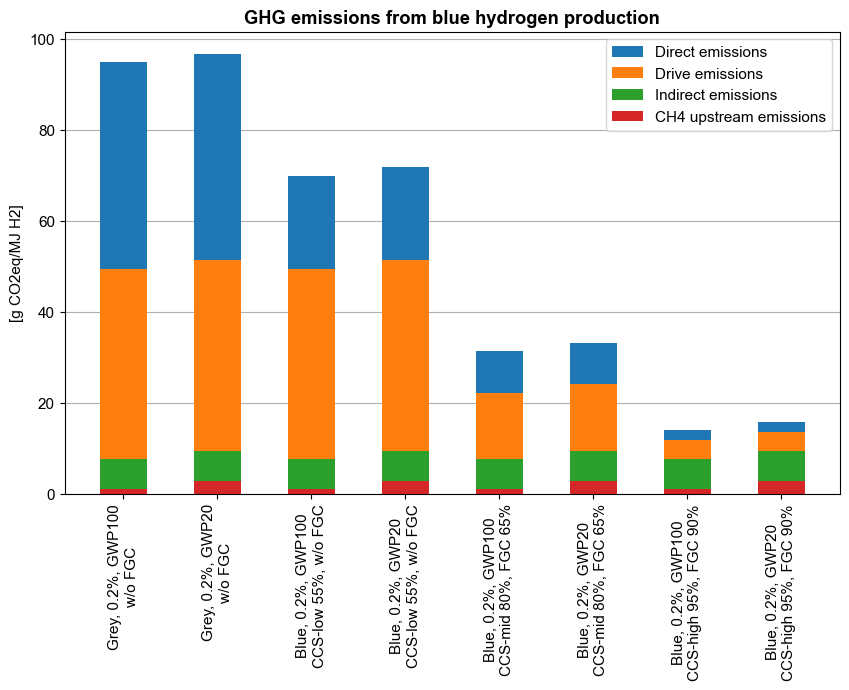

In [72]:
# Creating a stacked bar chart to display emissions. Adding lists for the bottom method.
fig, ax = plt.subplots(figsize=(10,6))

width = 0.5
#y_axis = np.arange(101,step=10)
direct = plt.bar(x, Direct_emissions, width, label='Direct emissions', bottom=list(map(lambda x, y, z: x + y + z, Upstream_emissions, Indirect_emissions_plt, Drive_emissions_plt)))
drive = plt.bar(x, Drive_emissions_plt, width, label='Drive emissions', bottom=list(map(lambda x, y: x + y, Upstream_emissions, Indirect_emissions_plt)))
indirect = plt.bar(x, Indirect_emissions, width, label = 'Indirect emissions', bottom=Upstream_emissions)
upstream = plt.bar(x, Upstream_emissions, width, label = 'CH4 upstream emissions')
plt.grid(True, axis = 'y')
ax.set_axisbelow(True)
#ax.twinx()
plt.xticks(rotation = 90)
#plt.yticks(y_axis)
#plt.ylim(0,90)
plt.legend(loc='upper right')
plt.title('GHG emissions from blue hydrogen production', fontweight = 'bold')
plt.ylabel('[g CO2eq/MJ H2]')

title = 'Blue_emission_breakdown'
plt.savefig(path_plt + title + '.png', transparent=True)
#ax.set_ylabel('kg CO2/kg H2')

Interpolated blue hydrogen production emissions starting from 55% total system capture rate -> up to 81%

# Sensitivity analysis

## Leakage rate

In [73]:
leakage_rate = np.arange(0,0.105,0.005)
leakage_rate


array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
       0.045, 0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085,
       0.09 , 0.095, 0.1  ])

In [81]:
sensitivity = []
# calculate emissions from blue hydrogen production in [g CO2eq/MJ H2]
def blue_h2_emissions(Direct_emissions_grey, capture_rate_high, Drive_CO2_emissions_grams_grey, capture_rate_flue_gas_high, Indirect_emissions, leakage_rate_low, Total_methane_SMR, GWP20_CH4):

    for i in leakage_rate:
        result = (Direct_emissions_grey * (1 - capture_rate_high)) + (Drive_CO2_emissions_grams_grey * (1 - capture_rate_flue_gas_high)) + Indirect_emissions + i * Total_methane_SMR * GWP20_CH4

        sensitivity.append(result)


    return sensitivity

In [83]:
blue_h2_emissions(Direct_emissions_grey, capture_rate_high, Drive_CO2_emissions_grams_grey, capture_rate_flue_gas_high, Indirect_emissions, leakage_rate_low, Total_methane_SMR, GWP20_CH4)

[13.018202367424244,
 20.150747180875733,
 27.28329199432722,
 34.41583680777871,
 41.5483816212302,
 48.68092643468169,
 55.813471248133176,
 62.94601606158467,
 70.07856087503615,
 77.21110568848763,
 84.34365050193912,
 91.47619531539061,
 98.6087401288421,
 105.74128494229362,
 112.8738297557451,
 120.00637456919657,
 127.13891938264806,
 134.27146419609957,
 141.40400900955103,
 148.53655382300252,
 155.669098636454]

In [84]:
leakage_sensi_GWP20 = pd.DataFrame(sensitivity, index=leakage_rate, columns=['Total_Emissions [g CO2eq/MJ H2]'])
leakage_sensi_GWP20

,Total_Emissions [g CO2eq/MJ H2]
0.000,13.018202
0.005,20.150747
0.010,27.283292
0.015,34.415837
0.020,41.548382
0.025,48.680926
0.030,55.813471
0.035,62.946016
0.040,70.078561
0.045,77.211106


In [85]:
leakage_sensi_GWP20.to_csv('leakage_sensi_GWP20.csv', sep = ';')

In [86]:
# calculate emissions from blue hydrogen production in [g CO2eq/MJ H2]
sensitivity = []
def blue_h2_emissions(Direct_emissions_grey, capture_rate_high, Drive_CO2_emissions_grams_grey, capture_rate_flue_gas_high, Indirect_emissions, leakage_rate_low, Total_methane_SMR, GWP20_CH4):

    for i in leakage_rate:
        result = (Direct_emissions_grey * (1 - capture_rate_high)) + (Drive_CO2_emissions_grams_grey * (1 - capture_rate_flue_gas_high)) + Indirect_emissions + i * Total_methane_SMR * GWP100_CH4

        sensitivity.append(result)


    return sensitivity

In [87]:
blue_h2_emissions(Direct_emissions_grey, capture_rate_high, Drive_CO2_emissions_grams_grey, capture_rate_flue_gas_high, Indirect_emissions, leakage_rate_low, Total_methane_SMR, GWP20_CH4)

[13.018202367424244,
 15.506299395372437,
 17.99439642332063,
 20.482493451268827,
 22.97059047921702,
 25.458687507165212,
 27.94678453511341,
 30.4348815630616,
 32.922978591009795,
 35.41107561895799,
 37.89917264690618,
 40.38726967485438,
 42.875366702802566,
 45.363463730750766,
 47.85156075869896,
 50.33965778664715,
 52.827754814595345,
 55.315851842543545,
 57.80394887049173,
 60.29204589843992,
 62.780142926388116]

In [88]:
leakage_sensi_GWP100 = pd.DataFrame(sensitivity, index=leakage_rate, columns=['Total_Emissions [g CO2eq/MJ H2]'])
leakage_sensi_GWP100

,Total_Emissions [g CO2eq/MJ H2]
0.000,13.018202
0.005,15.506299
0.010,17.994396
0.015,20.482493
0.020,22.970590
0.025,25.458688
0.030,27.946785
0.035,30.434882
0.040,32.922979
0.045,35.411076


In [89]:
# Create csv file from results dataframe
#output_file = os.path.join(path_csv,'leakage_sensi_GWP100.csv')
leakage_sensi_GWP100.to_csv('leakage_sensi_GWP100.csv', sep = ';')

NameError: name 'capture_sensi' is not defined

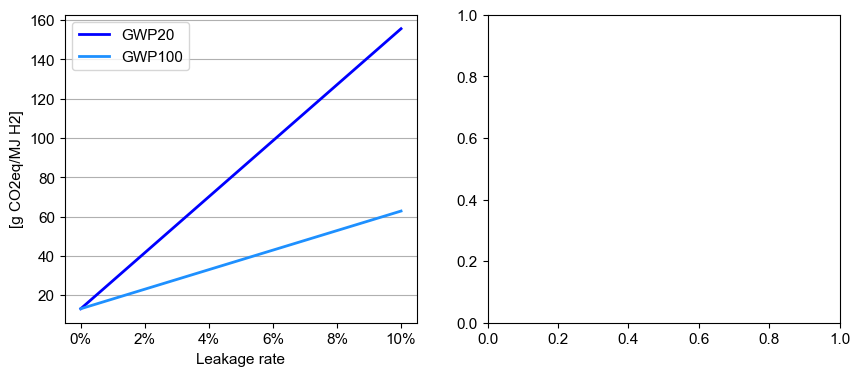

In [272]:
np.arange(0,0.105, 0.02)

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 ])

## Capture rate

In [93]:
capture_rate = np.arange(0.55, 1, 0.05)
capture_rate

array([0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])

In [94]:
sensitivity = []
# calculate emissions from blue hydrogen production in [g CO2eq/MJ H2]
def blue_h2_emissions(Direct_emissions_grey, capture_rate_high, Drive_CO2_emissions_grams_grey, capture_rate_flue_gas_high, Indirect_emissions, leakage_rate_low, Total_methane_SMR, GWP20_CH4):

    for i in capture_rate:

        result = (Direct_emissions_grey * (1-i)) + (Drive_CO2_emissions_grams_grey * (1 - i)) + Indirect_emissions + \
             leakage_rate_low * Total_methane_SMR * GWP20_CH4

        sensitivity.append(result)

    return sensitivity

In [95]:
blue_h2_emissions(Direct_emissions_grey, capture_rate_high, Drive_CO2_emissions_grams_grey, capture_rate_flue_gas_high, Indirect_emissions, leakage_rate_low, Total_methane_SMR, GWP20_CH4)

[48.72167332310787,
 44.35322995189575,
 39.984786580683625,
 35.616343209471495,
 31.247899838259364,
 26.87945646704724,
 22.511013095835114,
 18.142569724622987,
 13.774126353410864]

In [96]:
capture_sensi = pd.DataFrame(sensitivity, index=capture_rate, columns=['Total_Emissions [g CO2eq/MJ H2]'])
capture_sensi

,Total_Emissions [g CO2eq/MJ H2]
0.55,48.721673
0.60,44.353230
0.65,39.984787
0.70,35.616343
0.75,31.247900
0.80,26.879456
0.85,22.511013
0.90,18.142570
0.95,13.774126


In [97]:
capture_sensi.to_csv('capture_sensi.csv', sep = ';')

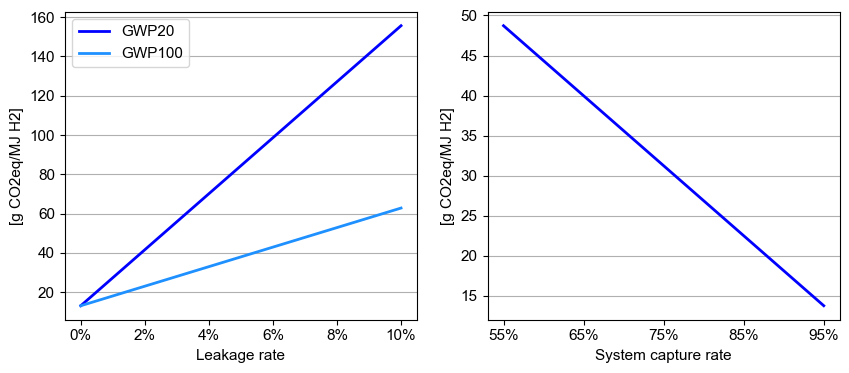

In [98]:
fig, ax = plt.subplots(figsize=(10,4))
plt.subplot(1,2,1)

plt.plot(leakage_sensi_GWP20, color='blue', linestyle='solid', label = 'GWP20' )
plt.plot(leakage_sensi_GWP100, color='dodgerblue',linestyle='-', label = 'GWP100')
plt.grid(True, axis='y')
ax.set_axisbelow(True)
#labels =
plt.xticks(np.arange(0,0.105, 0.02), ['0%', '2%', '4%', '6%', '8%', '10%'] )
plt.ylabel('[g CO2eq/MJ H2]')
plt.xlabel('Leakage rate')
plt.legend()

#Capture rates
plt.subplot(1,2,2)
plt.plot(capture_sensi, color='blue', linestyle='solid')
plt.grid(True, axis='y')
ax.set_axisbelow(True)
plt.ylabel('[g CO2eq/MJ H2]')
plt.xlabel('System capture rate'           )
#plt.xticks(np.arange(0.55,0.95, 0.1), ['55%', '60%', '65%', '70%', '75%', '80%', '85%', '90%', '95%'] )
plt.xticks(np.arange(0.55,1, 0.1), ['55%',  '65%',  '75%',  '85%',  '95%'] )

title = 'Leakage_and_capture_sensi'
plt.savefig(path_plt + title + '.png', transparent=True)

plt.show()

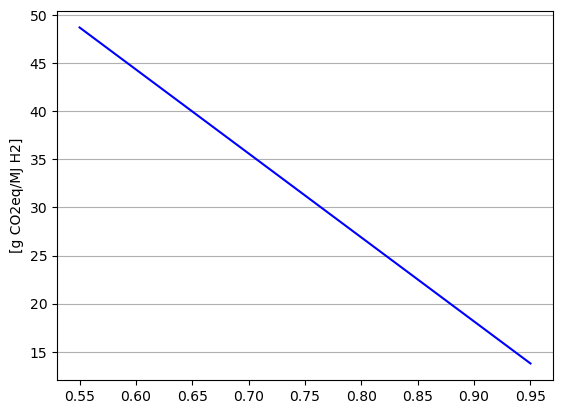

In [171]:
# Plot cost curve for liquefaction
fig, ax = plt.subplots()
fig.canvas.draw()
plt.plot(capture_sensi, color = 'blue', linestyle = 'solid')
plt.grid(True, axis = 'y')
ax.set_axisbelow(True)
plt.ylabel('[g CO2eq/MJ H2]')

title = 'Capture_sensi'
plt.savefig(path_plt+title+'.png', transparent = True)


plt.show()

In [ ]:
# Create csv file from results dataframe
output_file = os.path.join(path_csv,'leakage_sensi.csv')
result.to_csv(output_file, sep = ';')

In [ ]:
# export result to excel
writer = pd.ExcelWriter(path, engine='openpyxl', mode='a', if_sheet_exists='overlay')
book = load_workbook(path)
#writer.book = book
#writer.sheets = dict((ws.title, ws) for ws in book.worksheets)

ws = book['Sensitivity Results']

leakage_sensi.to_excel(writer, sheet_name='Sensitivity Results', index=True, startcol=ws.max_column)
book.save(path)
book.close()

# Colour table


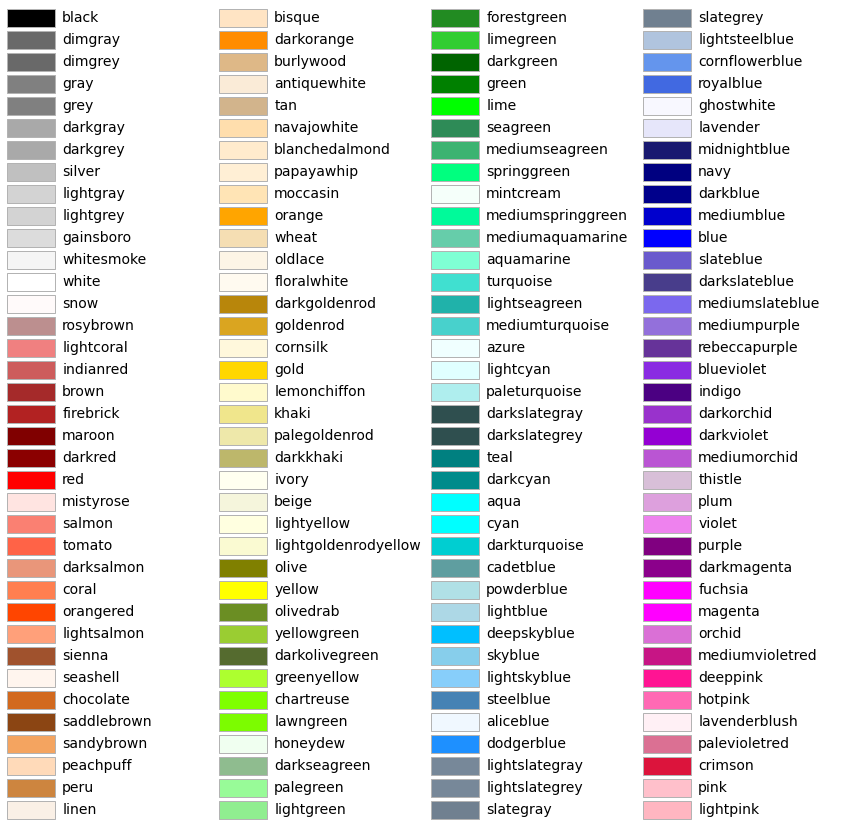

In [281]:
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


def plot_colortable(colors, sort_colors=True, emptycols=0):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(color))),
                         name)
                        for name, color in colors.items())
        names = [name for hsv, name in by_hsv]
    else:
        names = list(colors)

    n = len(names)
    ncols = 4 - emptycols
    nrows = n // ncols + int(n % ncols > 0)

    width = cell_width * 4 + 2 * margin
    height = cell_height * nrows + 2 * margin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-margin)/height)
    ax.set_xlim(0, cell_width * 4)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                      height=18, facecolor=colors[name], edgecolor='0.7')
        )

    return fig
plot_colortable(mcolors.CSS4_COLORS)
plt.show()